In [1]:


# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px



In [2]:


# Load the dataset
df = pd.read_csv("C:\\Users\\cvyas\\Downloads\\mock_fashion_data_uk_us.csv\\mock_fashion_data_uk_us.csv")

df. head()

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,N9Q4,15.430975,Jigsaw,Footwear,Very Bad,3.967106,197,Streetwear,"S, M, L",M,Blue,Average,27,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,V2T6,81.116542,Alexander McQueen,Outerwear,Not Good,2.844659,473,Formal,"S, M, L",L,Red,Very High,50,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,S7Y1,31.633686,Tommy Hilfiger,Bottoms,Very Good,1.183242,55,Sporty,"M, L, XL",S,Green,Above Average,23,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive


In [3]:

# Clean column names by stripping any leading/trailing spaces
df.columns = df.columns.str.strip()


In [4]:



# Define numerical and categorical columns
num_cols = ['Price', 'Rating', 'Review Count', 'Age']
cat_cols = ['Brand', 'Category', 'Description', 'Style Attributes', 'Color',
            'Fashion Magazines', 'Fashion Influencers', 'Season', 
            'Time Period Highest Purchase', 'Customer Reviews', 
            'Social Media Comments', 'feedback']

# Data Analysis: Categorical variable contribution
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count().head(60)



value
variable            value                    
Brand               Alexander McQueen  125127
                    Burberry           124813
                    Calvin Klein       124710
                    Jigsaw             125307
                    Mulberry           124662
                    Ralph Lauren       125575
                    Ted Baker          124531
                    Tommy Hilfiger     125275
Category            Accessories        100291
                    Activewear          99751
                    Bottoms             99666
                    Dresses             99950
                    Footwear            99793
                    Jewelry            100155
                    Lingerie            99949
                    Outerwear          100076
                    Swimwear           100328
                    Tops               100041
Color               Black              249945
                    Blue               250498
                    Green              249891
                    Red                249666
Customer Reviews    Mixed              200029
                    Negative           200359
                    Neutral            200028
                    Positive           200173
                    Unknown            199411
Description         Bad                143636
                    Best               142560
                    Good               142494
                    Not Good           142766
                    Very Bad           143528
                    Very Good          142032
                    Worst              142984
Fashion Influencers Aimee Song          99783
                    Camila Coelho      100273
                    Chiara Ferragni    100109
                    Gigi Hadid         100122
                    Julie Sariñana      99774
                    Kendall Jenner     100184
                    Leandra Medine     100136
                    Negin Mirsalehi     99482
                    Olivia Palermo     100273
                    Song of Style       99864
Fashion Magazines   Cosmopolitan        99746
                    Elle                99994
                    Fashionista        100355
                    Glamour             99856
                    Grazia              99971
                    Harper's Bazaar    100263
                    InStyle             99454
                    Marie Claire       100099
                    Vogue              100234
                    W                  100028
Season              Fall               167194
                    Fall/Winter        166748
                    Spring             167217
                    Spring/Summer      166101
                    Summer             165862
                    Winter             166878

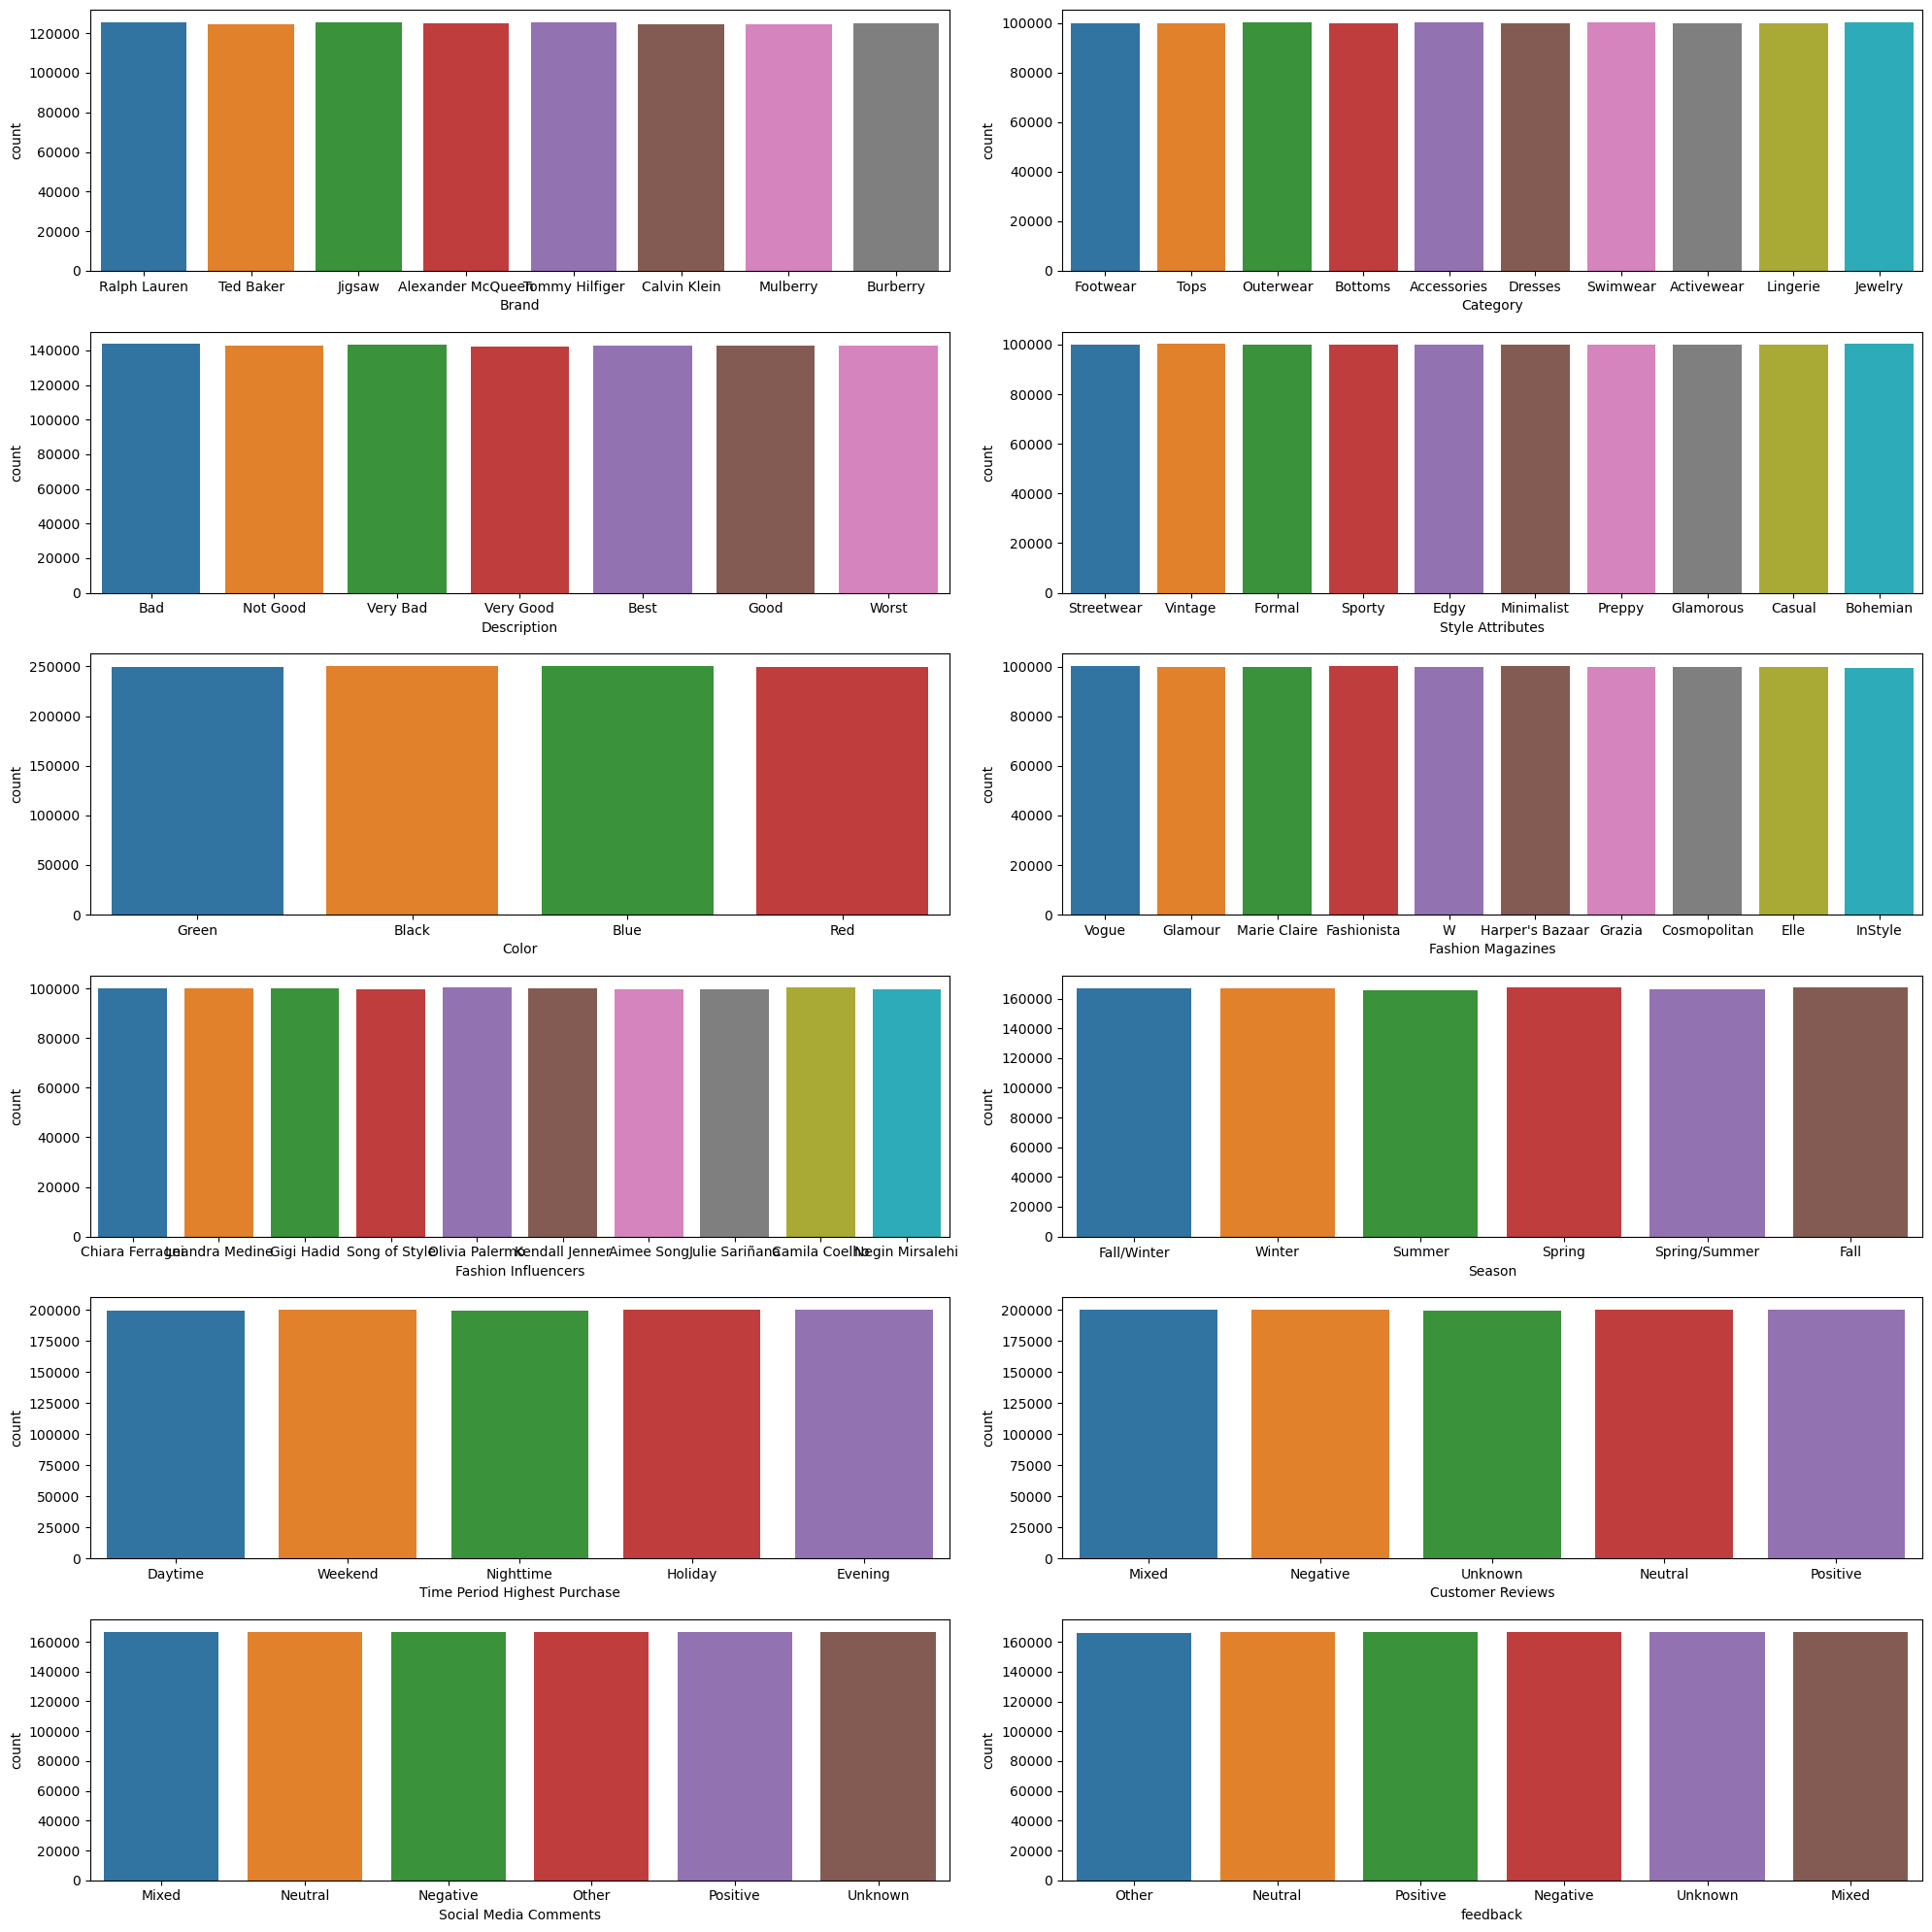

In [5]:

# Countplots for categorical columns
fig, axis = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))
index = 0
for row in range(6):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1
plt.tight_layout()
plt.show()


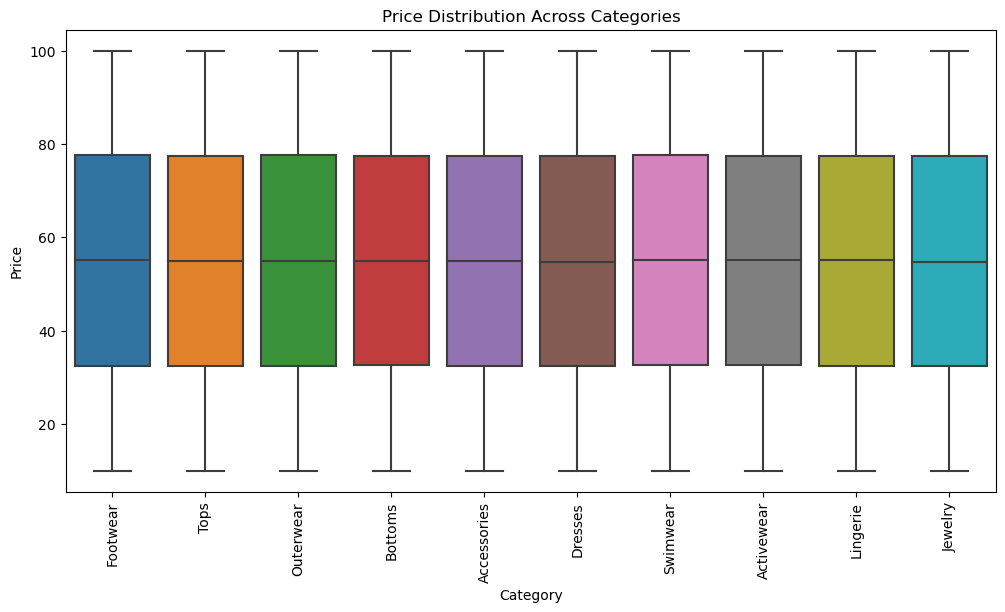

In [6]:

# Boxplot: Price distribution across categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=df)
plt.title('Price Distribution Across Categories')
plt.xticks(rotation=90)
plt.show()

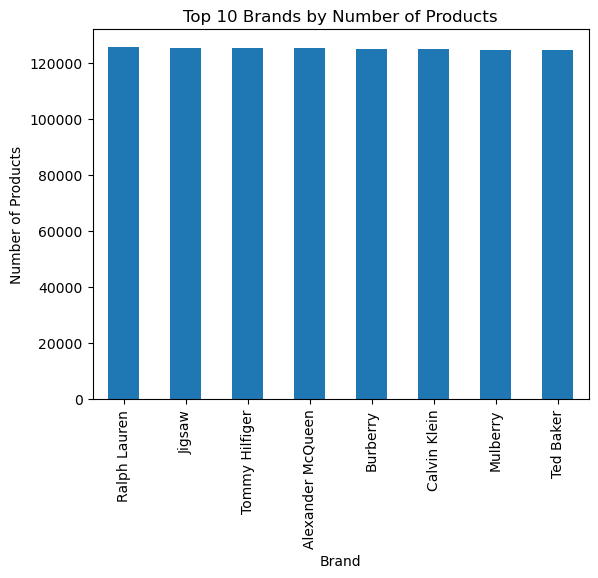

In [7]:
# Bar chart: Top brands by number of products
top_brands = df['Brand'].value_counts().head(10)
top_brands.plot(kind='bar', title='Top 10 Brands by Number of Products')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.show()



C:\Users\cvyas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


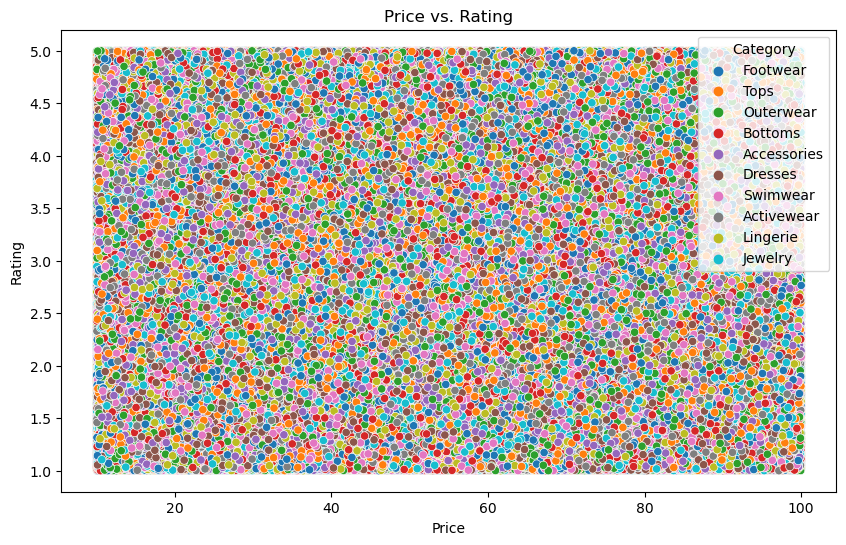

In [8]:
# Scatter plot: Relationship between rating and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', hue='Category', data=df)
plt.title('Price vs. Rating')
plt.show()



C:\Users\cvyas\AppData\Local\Temp\ipykernel_19668\605489018.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


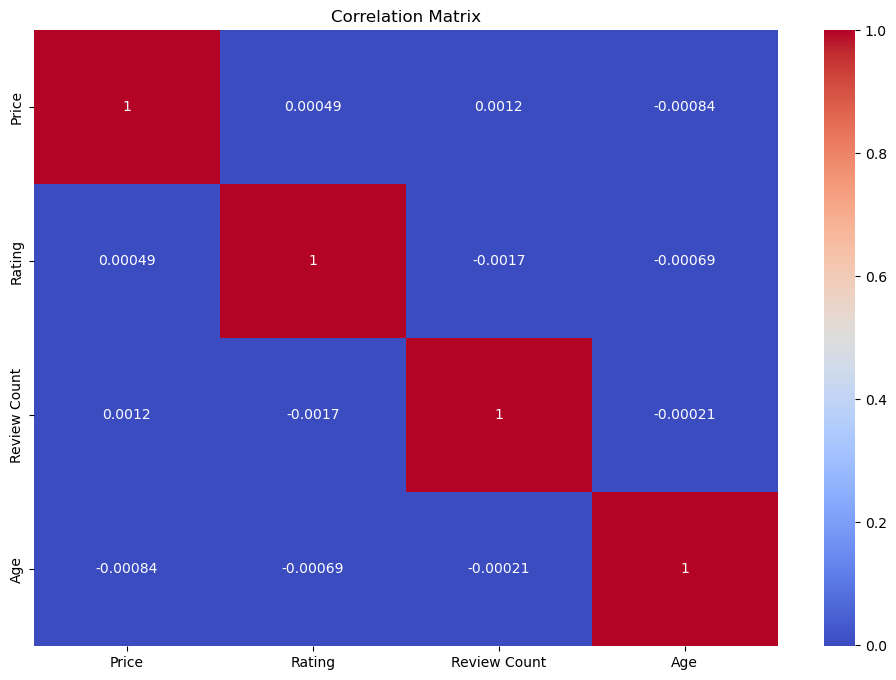

In [9]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



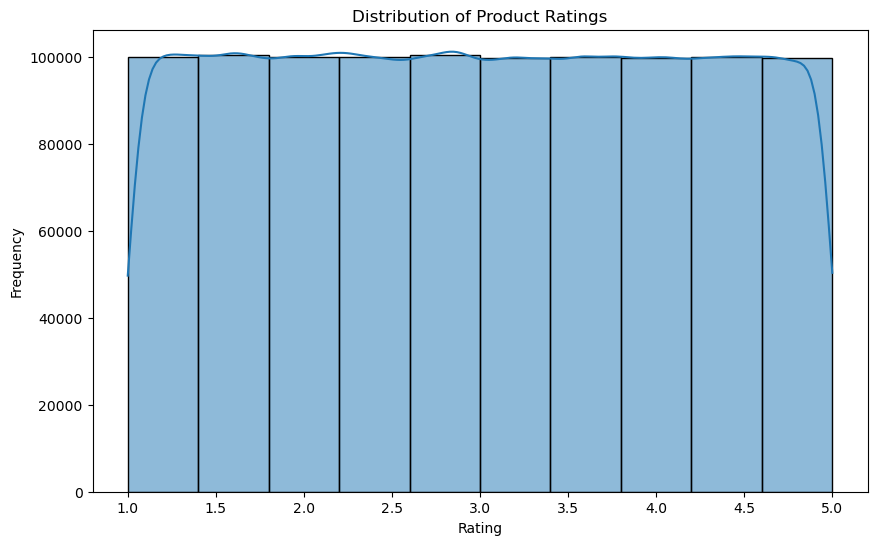

In [10]:
# Histogram: Product ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



C:\Users\cvyas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


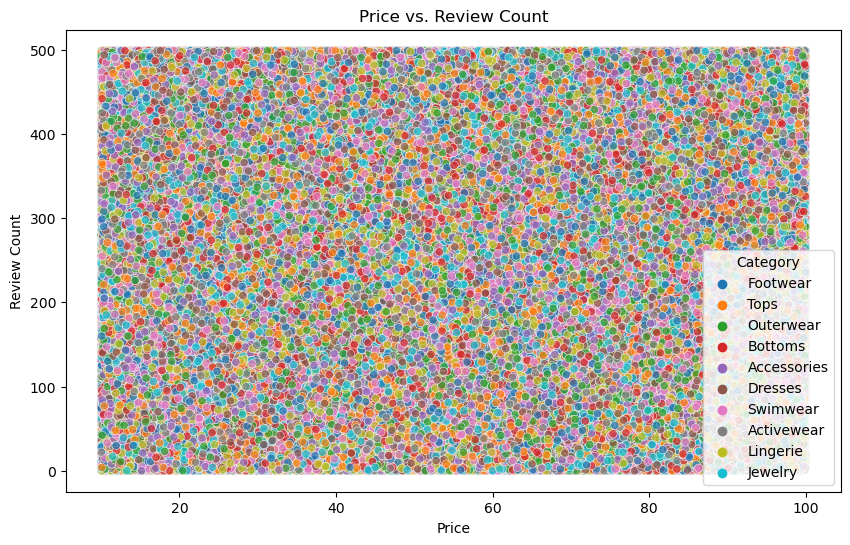

In [11]:
# Scatter plot: Price vs. Review Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Review Count', hue='Category', data=df, alpha=0.7)
plt.title('Price vs. Review Count')
plt.show()



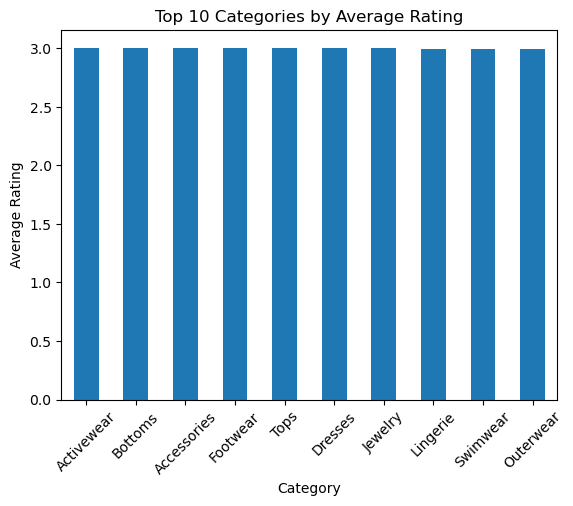

In [12]:
# Bar chart: Top categories by average rating
top_categories = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
top_categories.plot(kind='bar', title='Top 10 Categories by Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()



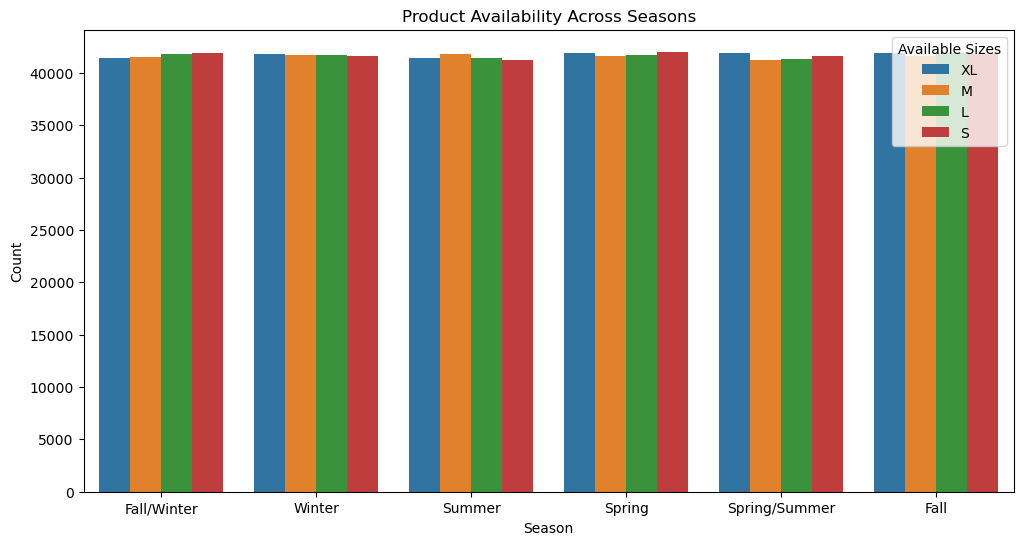

In [13]:
# Count plot: Product availability across different seasons
plt.figure(figsize=(12, 6))
sns.countplot(x='Season', hue='Available Sizes', data=df)
plt.title('Product Availability Across Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()



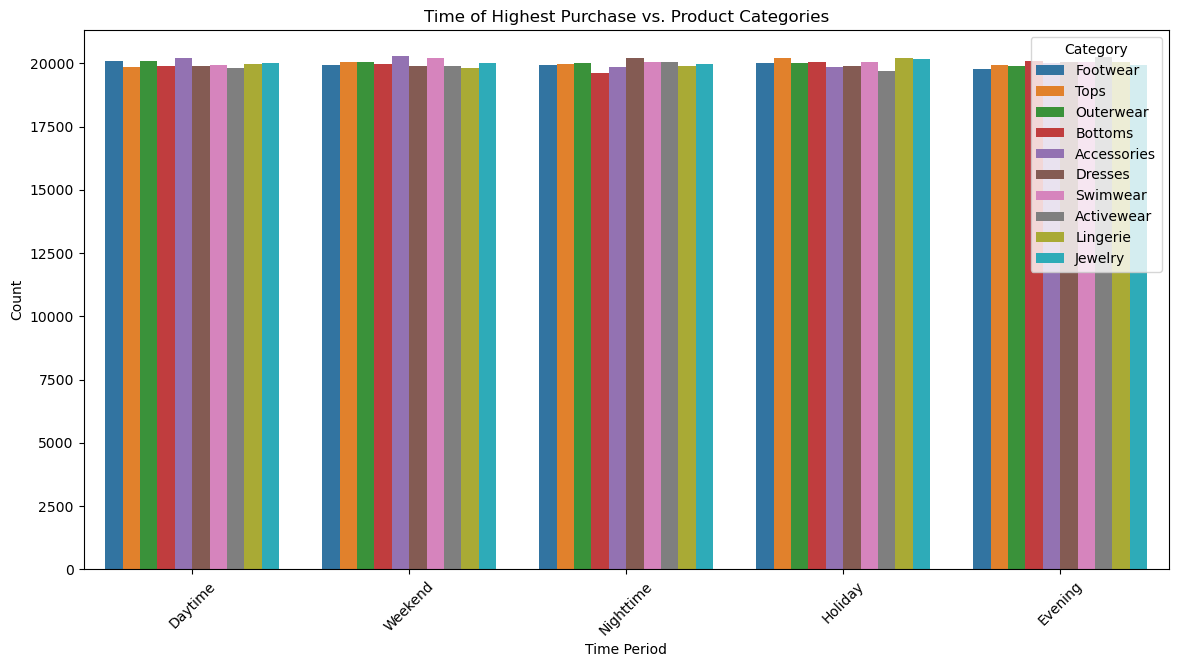

In [14]:
# Count plot: Time period highest purchase vs. product categories
plt.figure(figsize=(14, 7))
sns.countplot(x='Time Period Highest Purchase', hue='Category', data=df)
plt.title('Time of Highest Purchase vs. Product Categories')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




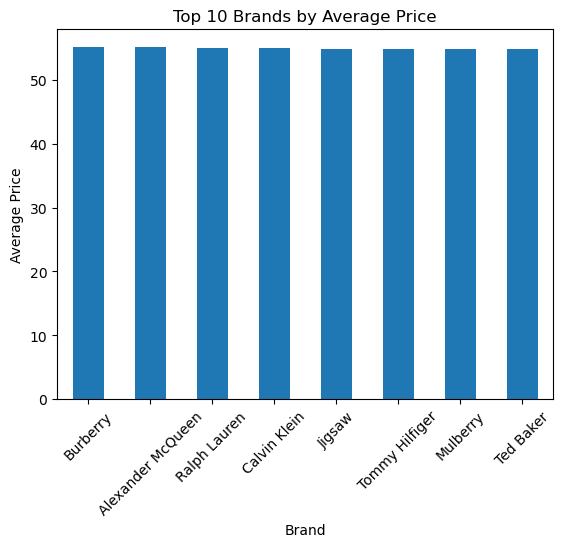

In [15]:
# Bar chart: Average price per brand
avg_price_per_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(10)
avg_price_per_brand.plot(kind='bar', title='Top 10 Brands by Average Price')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()



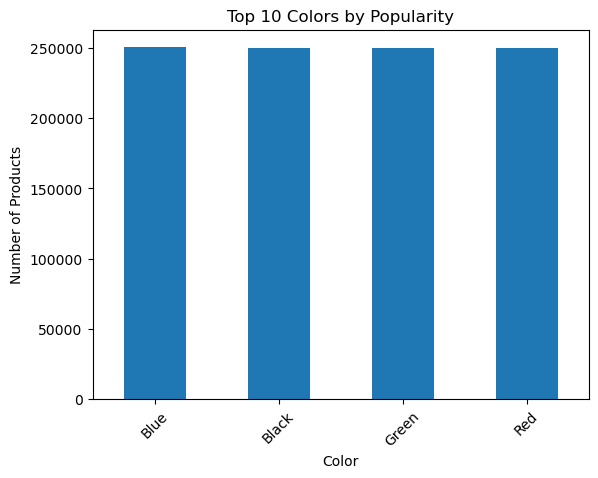

In [16]:
# Bar chart: Top colors by popularity
top_colors = df['Color'].value_counts().head(10)
top_colors.plot(kind='bar', title='Top 10 Colors by Popularity')
plt.xlabel('Color')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()



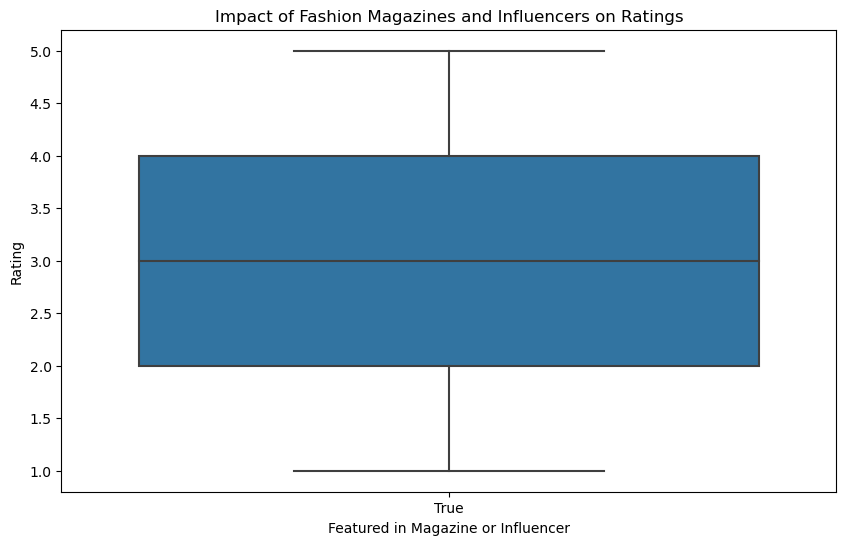

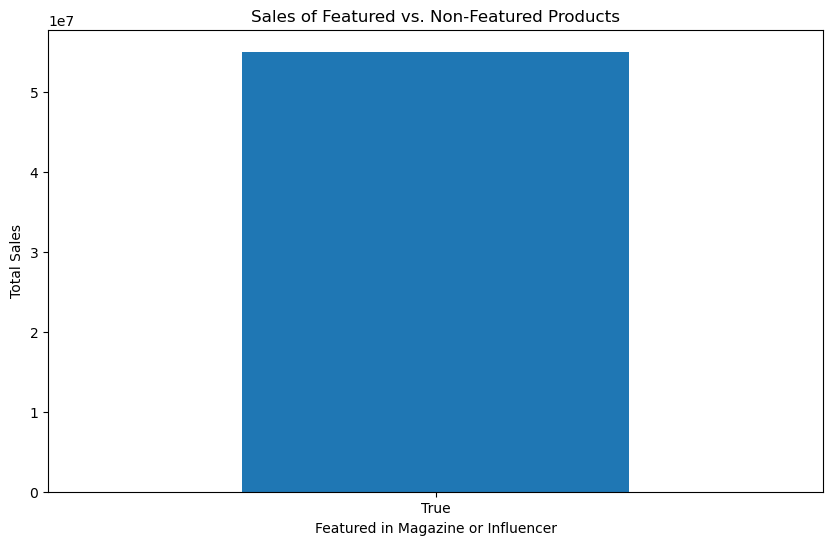

In [17]:
# Feature Impact Analysis: Fashion Magazines and Influencers
df['Featured'] = (df['Fashion Magazines'] != '-') | (df['Fashion Influencers'] != '-')

# Boxplot: Ratings for featured vs. non-featured products
plt.figure(figsize=(10, 6))
sns.boxplot(x='Featured', y='Rating', data=df)
plt.title('Impact of Fashion Magazines and Influencers on Ratings')
plt.xlabel('Featured in Magazine or Influencer')
plt.ylabel('Rating')
plt.show()

# Sales comparison: Featured vs. Non-Featured products
featured_sales = df.groupby('Featured')['Price'].sum()

# Bar chart: Sales of featured vs. non-featured products
plt.figure(figsize=(10, 6))
featured_sales.plot(kind='bar', title='Sales of Featured vs. Non-Featured Products')
plt.xlabel('Featured in Magazine or Influencer')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()



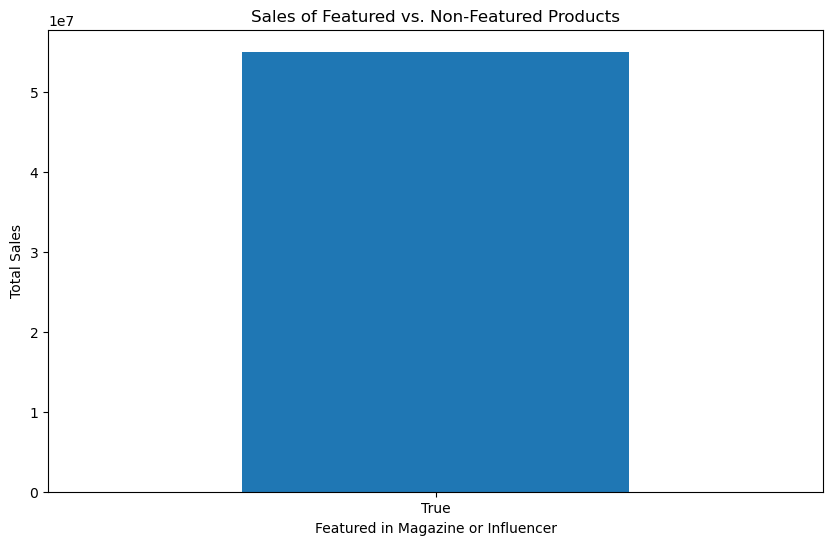

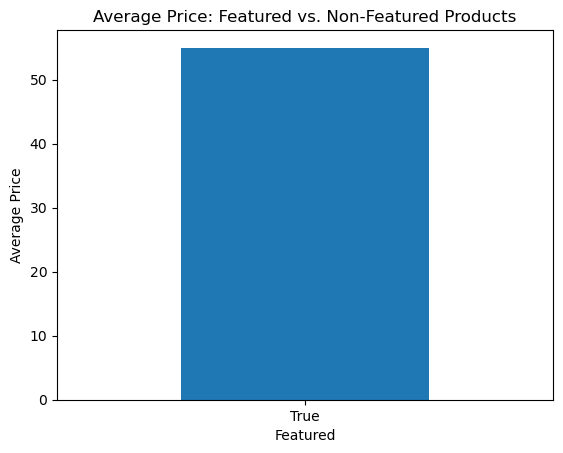

In [20]:
# Calculate total sales for featured vs. non-featured products
featured_sales = df.groupby('Featured')['Price'].sum()

# Bar chart for sales of featured vs. non-featured products
plt.figure(figsize=(10, 6))
featured_sales.plot(kind='bar', title='Sales of Featured vs. Non-Featured Products')
plt.xlabel('Featured in Magazine or Influencer')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

# Average price of featured vs. non-featured products
avg_price_featured = df.groupby('Featured')['Price'].mean()
avg_price_featured.plot(kind='bar', title='Average Price: Featured vs. Non-Featured Products')
plt.xlabel('Featured')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()


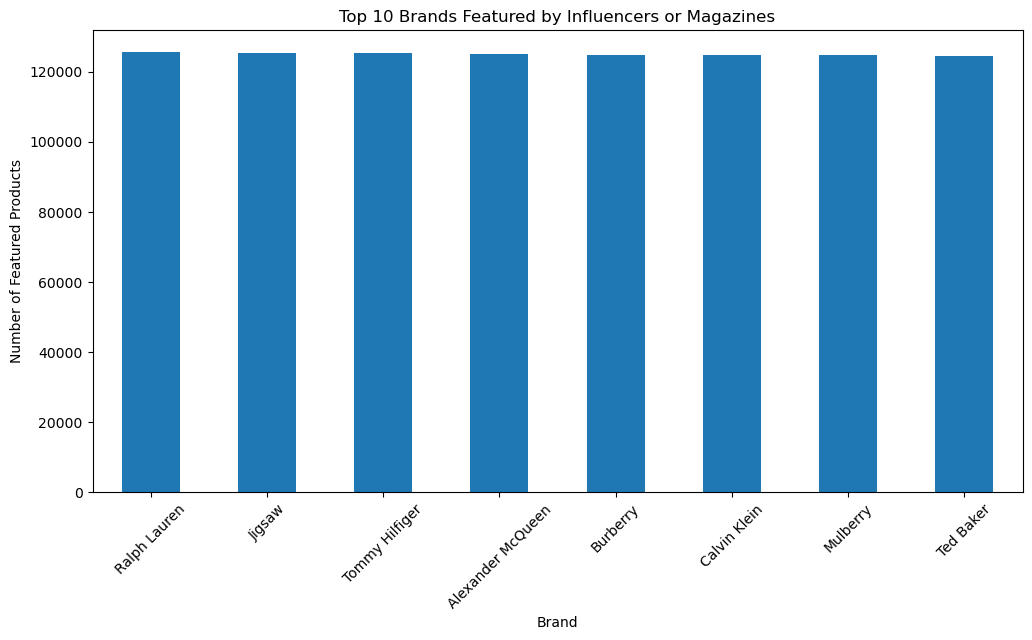

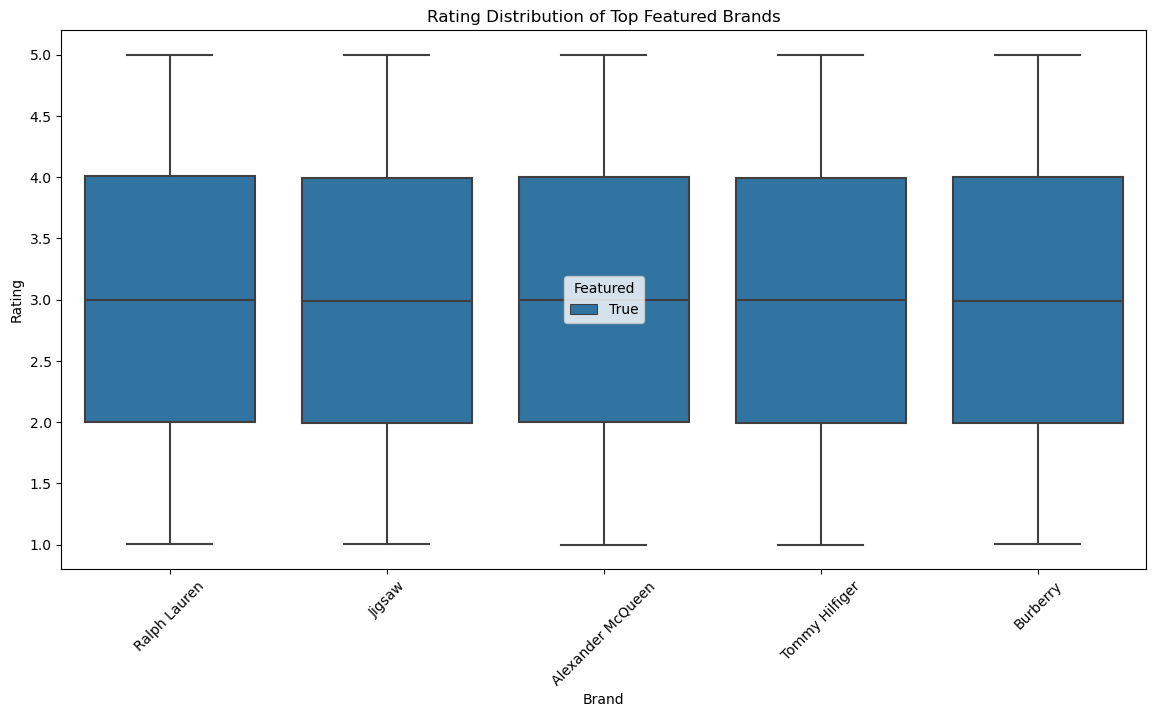

In [21]:
# Count the number of products featured by brand
featured_by_brand = df[df['Featured']].groupby('Brand')['Featured'].count().sort_values(ascending=False)

# Bar plot of top brands featured by influencers or magazines
plt.figure(figsize=(12, 6))
featured_by_brand.head(10).plot(kind='bar', title='Top 10 Brands Featured by Influencers or Magazines')
plt.xlabel('Brand')
plt.ylabel('Number of Featured Products')
plt.xticks(rotation=45)
plt.show()

# Comparing rating distribution for top brands that are featured
top_featured_brands = featured_by_brand.head(5).index
plt.figure(figsize=(14, 7))
sns.boxplot(x='Brand', y='Rating', hue='Featured', data=df[df['Brand'].isin(top_featured_brands)])
plt.title('Rating Distribution of Top Featured Brands')
plt.xticks(rotation=45)
plt.show()


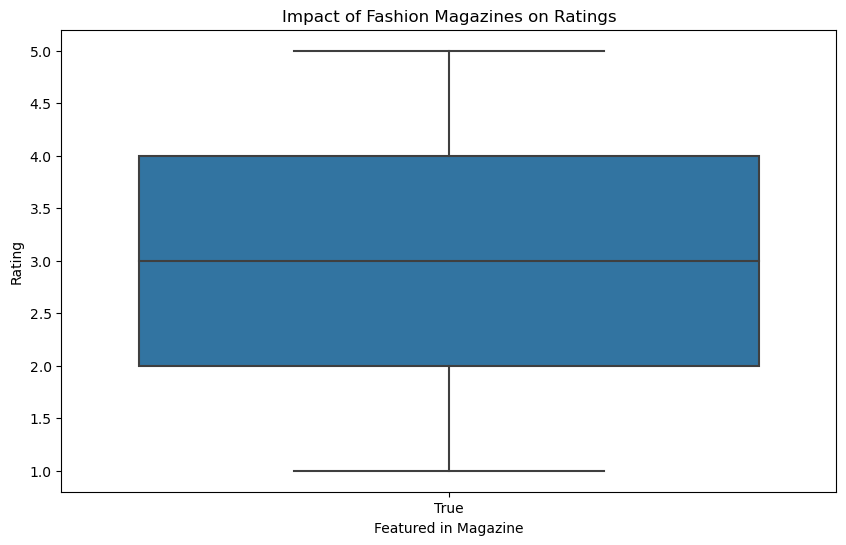

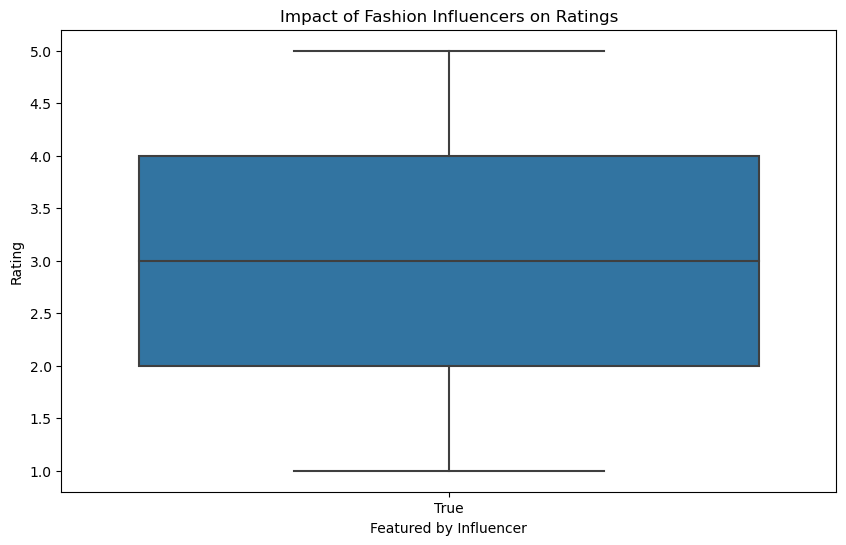

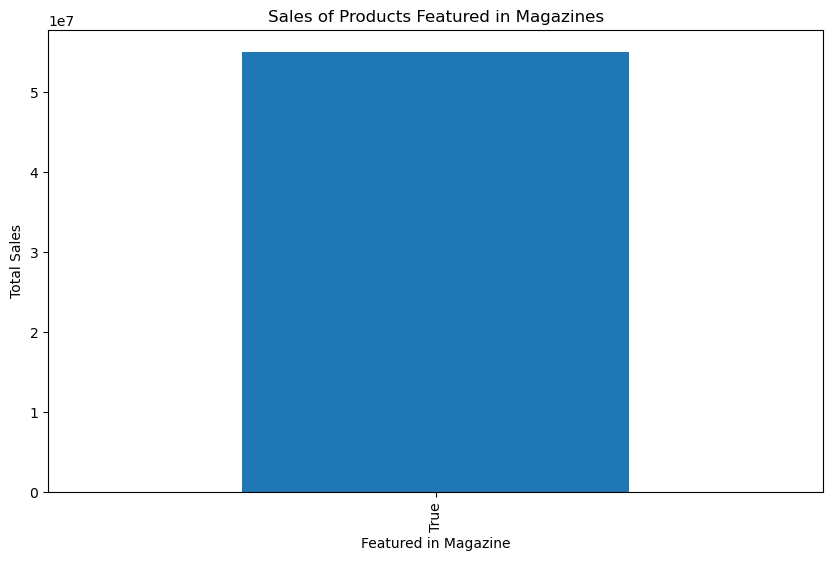

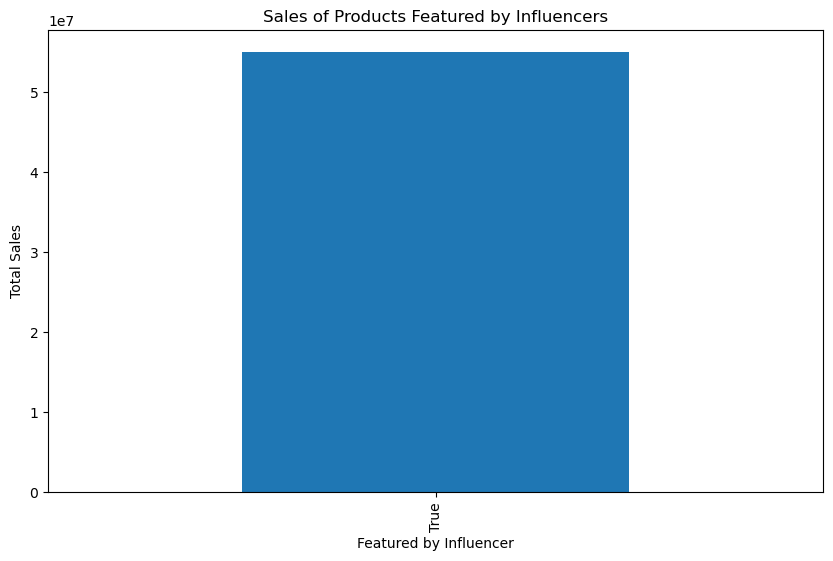

In [22]:
# Create separate columns for magazine and influencer features
df['Featured_Magazine'] = df['Fashion Magazines'] != '-'
df['Featured_Influencer'] = df['Fashion Influencers'] != '-'

# Boxplot to compare ratings for products featured by magazines vs influencers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Featured_Magazine', y='Rating', data=df)
plt.title('Impact of Fashion Magazines on Ratings')
plt.xlabel('Featured in Magazine')
plt.ylabel('Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Featured_Influencer', y='Rating', data=df)
plt.title('Impact of Fashion Influencers on Ratings')
plt.xlabel('Featured by Influencer')
plt.ylabel('Rating')
plt.show()

# Sales comparison for magazine vs influencer features
sales_magazine = df.groupby('Featured_Magazine')['Price'].sum()
sales_influencer = df.groupby('Featured_Influencer')['Price'].sum()

plt.figure(figsize=(10, 6))
sales_magazine.plot(kind='bar', title='Sales of Products Featured in Magazines')
plt.xlabel('Featured in Magazine')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(10, 6))
sales_influencer.plot(kind='bar', title='Sales of Products Featured by Influencers')
plt.xlabel('Featured by Influencer')
plt.ylabel('Total Sales')
plt.show()


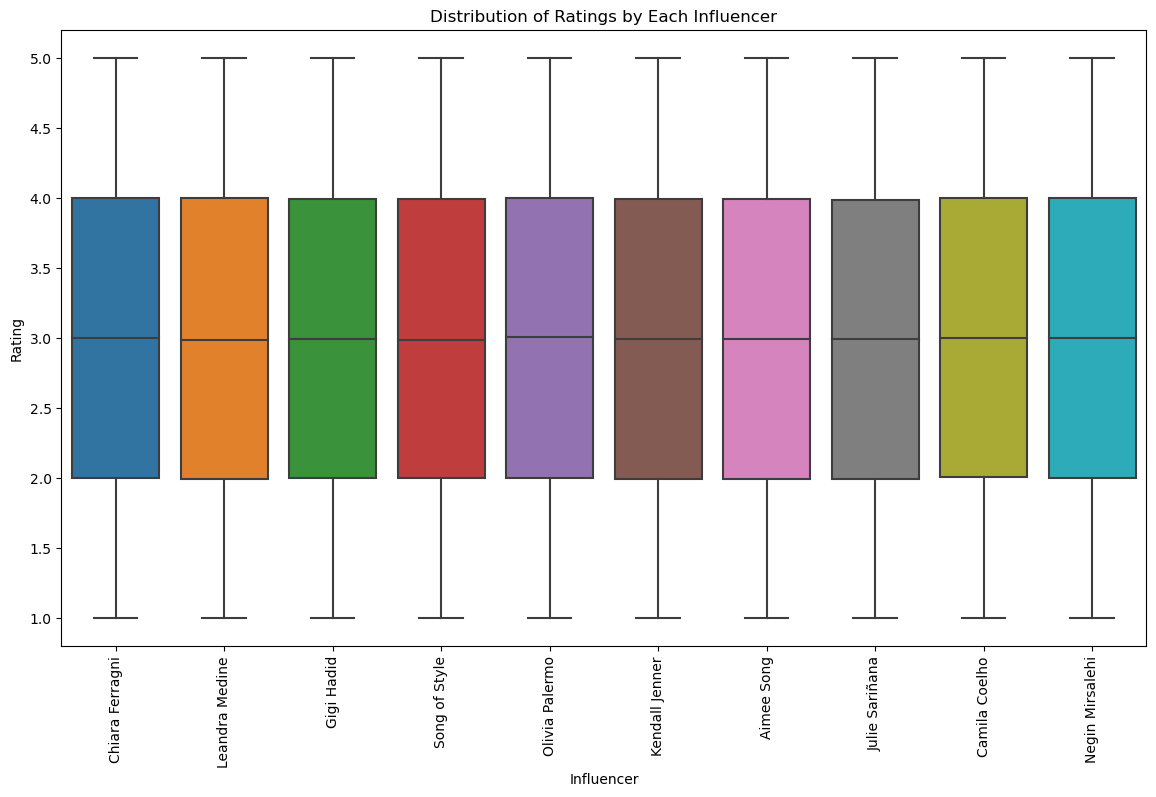

In [23]:
# Assuming 'Fashion Influencers' contains multiple influencers separated by commas
# First, split the influencers into separate rows for better analysis

# Create a new DataFrame where each row represents a single influencer for a product
df_influencers = df.assign(Fashion_Influencers=df['Fashion Influencers'].str.split(',')).explode('Fashion_Influencers')

# Clean up influencer names
df_influencers['Fashion_Influencers'] = df_influencers['Fashion_Influencers'].str.strip()

# Boxplot of ratings by each influencer
plt.figure(figsize=(14, 8))
sns.boxplot(x='Fashion_Influencers', y='Rating', data=df_influencers)
plt.title('Distribution of Ratings by Each Influencer')
plt.xlabel('Influencer')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


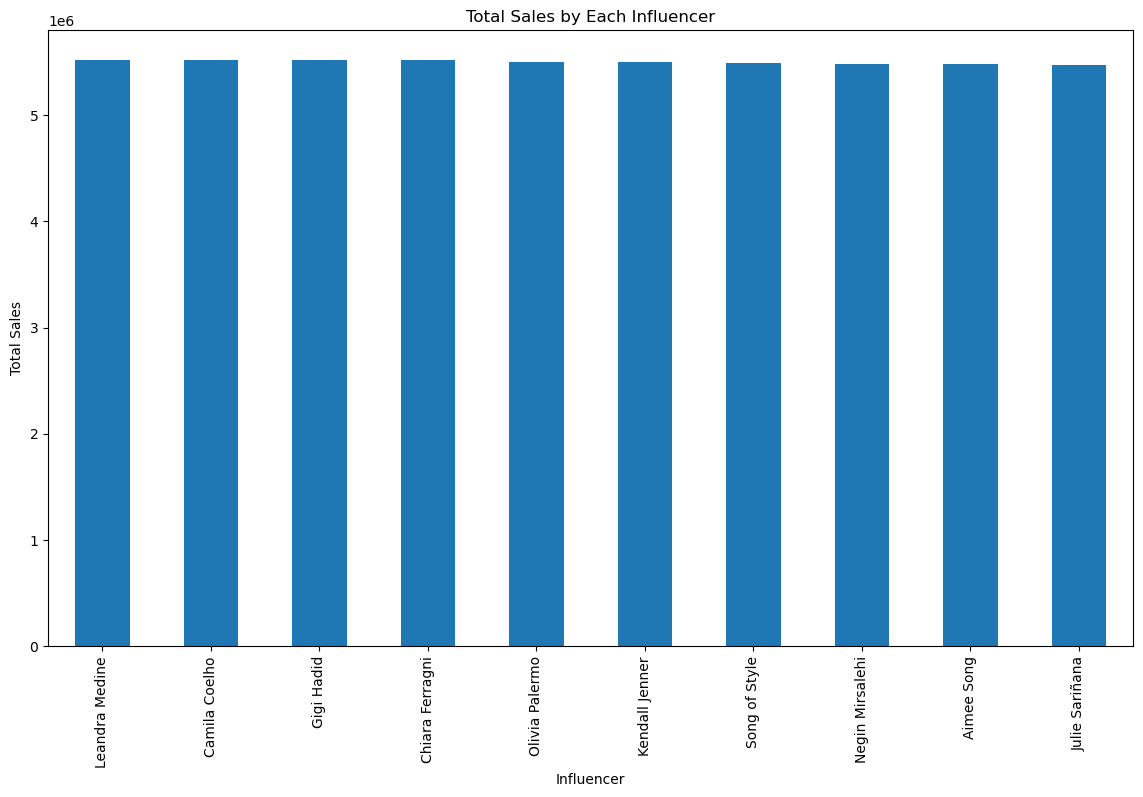

In [24]:
# Aggregate total sales by each influencer
sales_by_influencer = df_influencers.groupby('Fashion_Influencers')['Price'].sum().sort_values(ascending=False)

# Bar chart of total sales by influencer
plt.figure(figsize=(14, 8))
sales_by_influencer.plot(kind='bar', title='Total Sales by Each Influencer')
plt.xlabel('Influencer')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


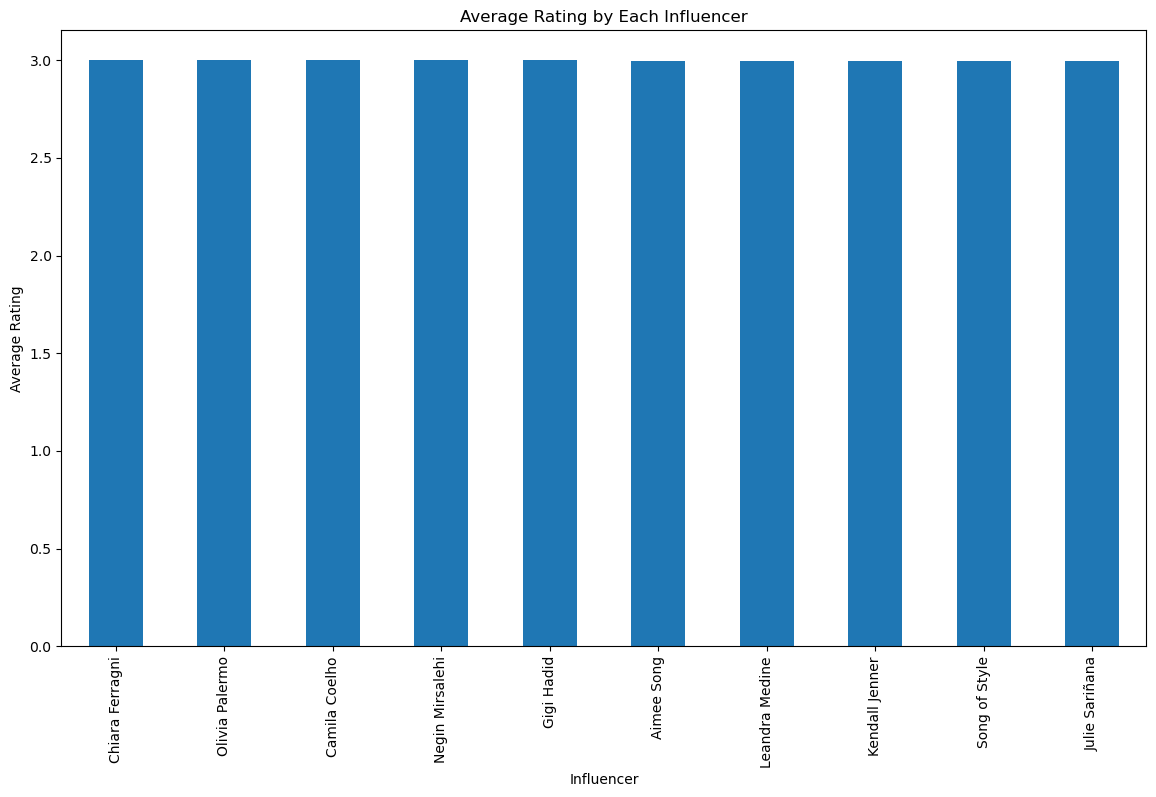

In [25]:
# Aggregate average ratings by each influencer
avg_rating_by_influencer = df_influencers.groupby('Fashion_Influencers')['Rating'].mean().sort_values(ascending=False)

# Bar chart of average ratings by influencer
plt.figure(figsize=(14, 8))
avg_rating_by_influencer.plot(kind='bar', title='Average Rating by Each Influencer')
plt.xlabel('Influencer')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


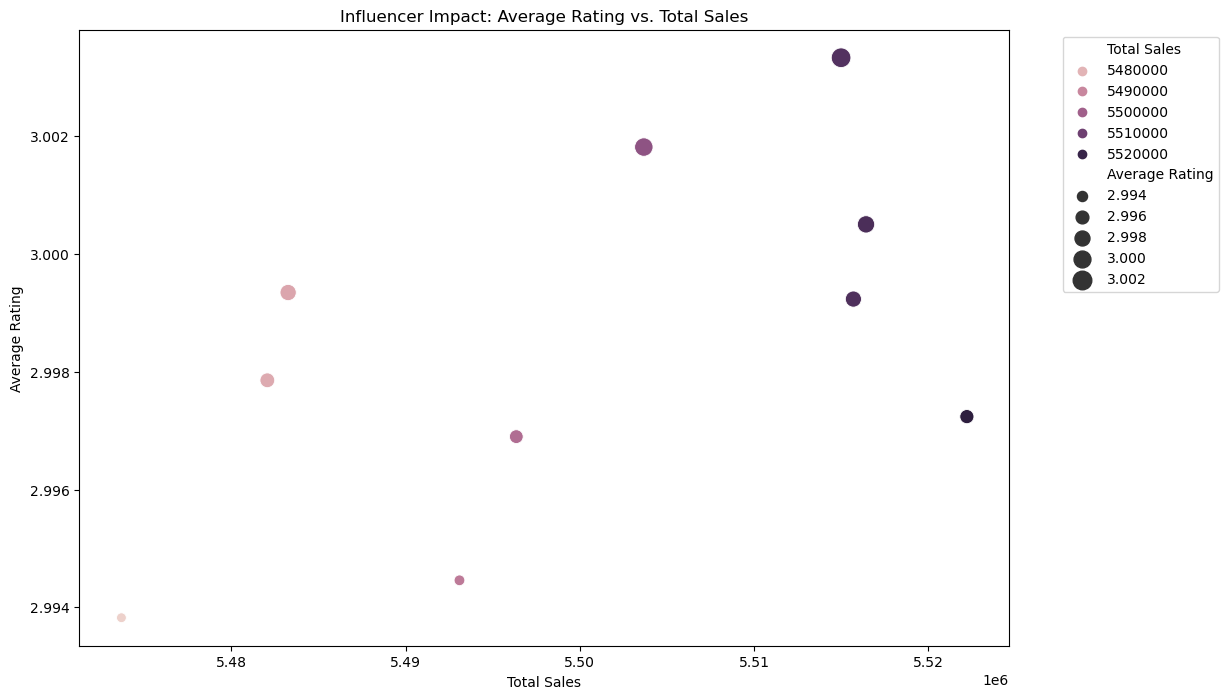

In [26]:
# Create a DataFrame to combine average rating and total sales for each influencer
influencer_impact = pd.DataFrame({
    'Total Sales': sales_by_influencer,
    'Average Rating': avg_rating_by_influencer
}).reset_index()

# Scatter plot of average rating vs. total sales
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Sales', y='Average Rating', data=influencer_impact, hue='Total Sales', size='Average Rating', sizes=(50, 200))
plt.title('Influencer Impact: Average Rating vs. Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Average Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


        Influencer   Total Sales  Average Rating
0       Aimee Song  5.482066e+06        2.997856
1    Camila Coelho  5.516418e+06        3.000505
2  Chiara Ferragni  5.514986e+06        3.003337
3       Gigi Hadid  5.515692e+06        2.999236
4   Julie Sariñana  5.473694e+06        2.993821
6     Leandra Medine
1      Camila Coelho
3         Gigi Hadid
2    Chiara Ferragni
8     Olivia Palermo
Name: Influencer, dtype: object
  Product Name      Price              Brand   Category Description    Rating  \
0         T5D3  97.509966       Ralph Lauren   Footwear         Bad  1.421706   
1         Y0V7  52.341277          Ted Baker       Tops    Not Good  1.037677   
2         N9Q4  15.430975             Jigsaw   Footwear    Very Bad  3.967106   
3         V2T6  81.116542  Alexander McQueen  Outerwear    Not Good  2.844659   
5         N5B8  46.184163  Alexander McQueen  Outerwear    Very Bad  3.296389   

   Review Count Style Attributes Total Sizes Available Sizes  ...  \
0           4

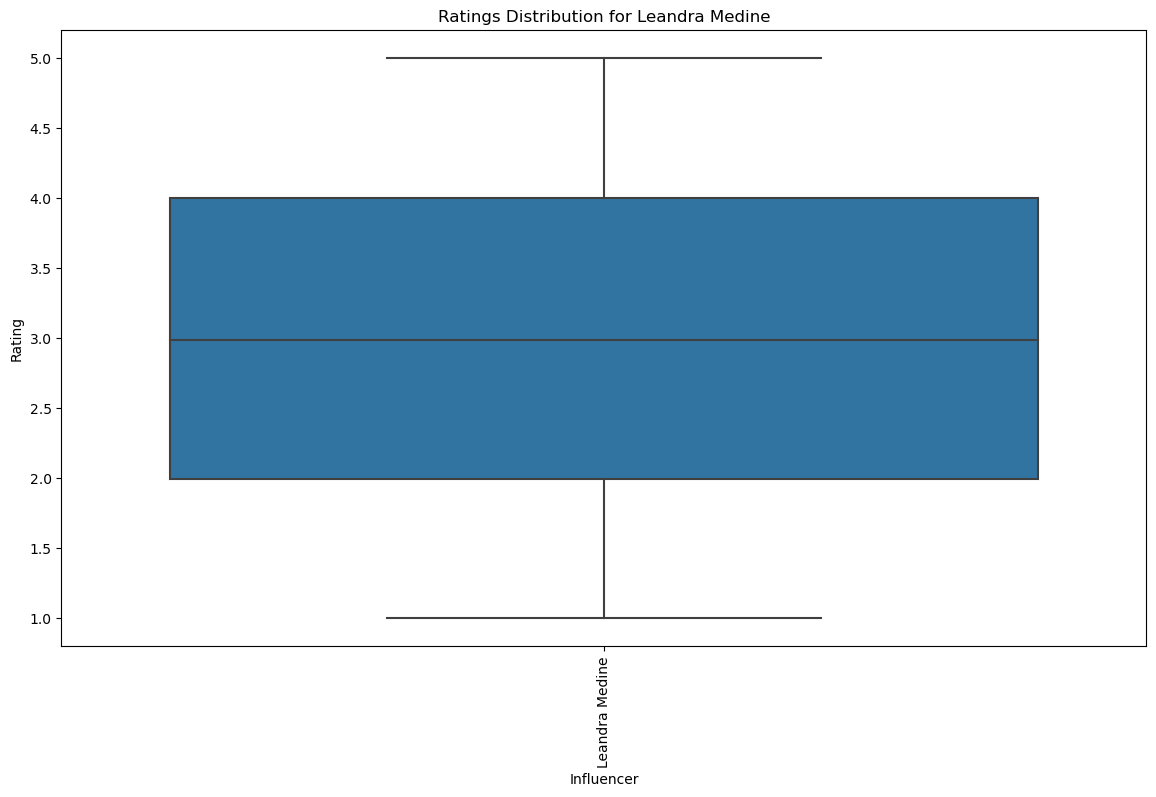

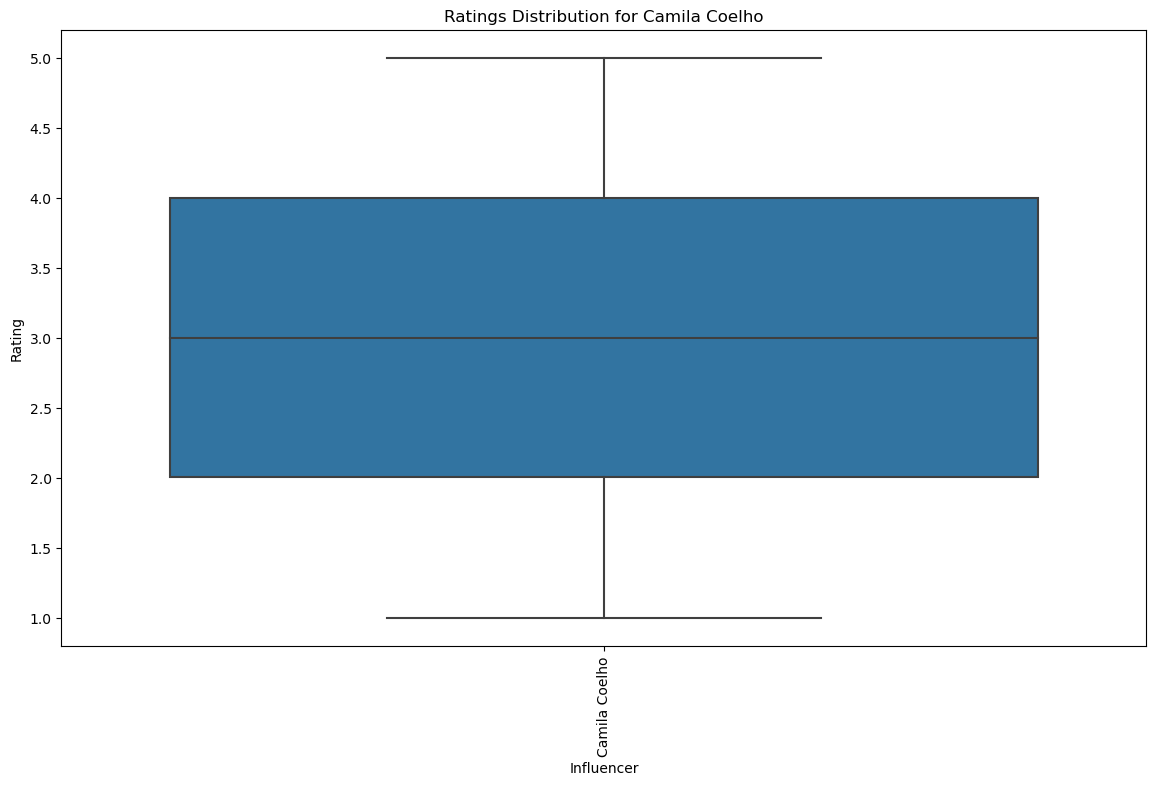

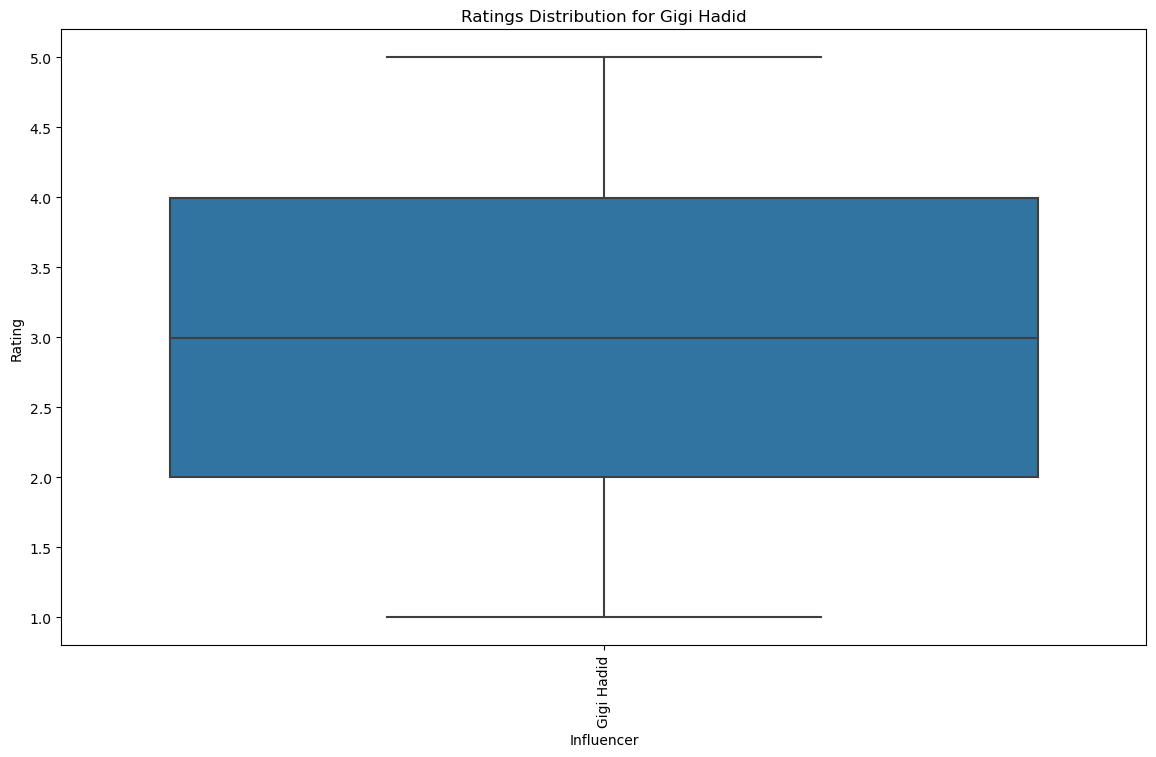

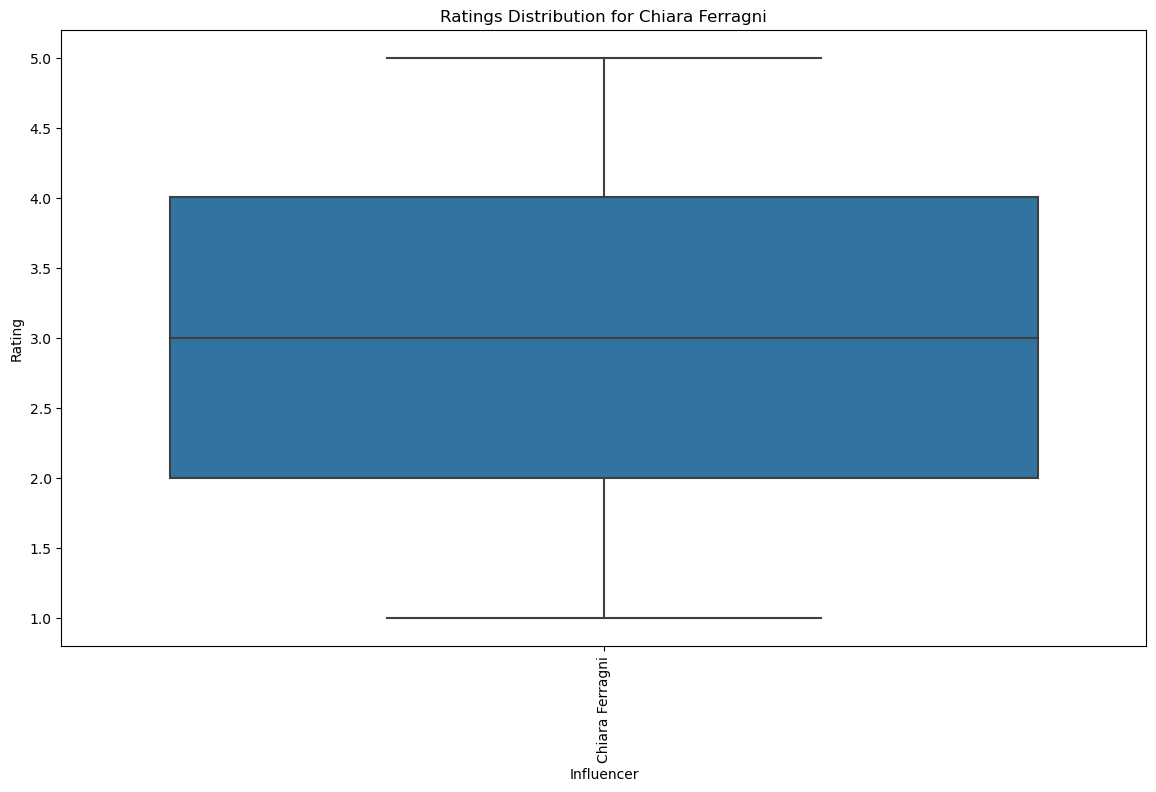

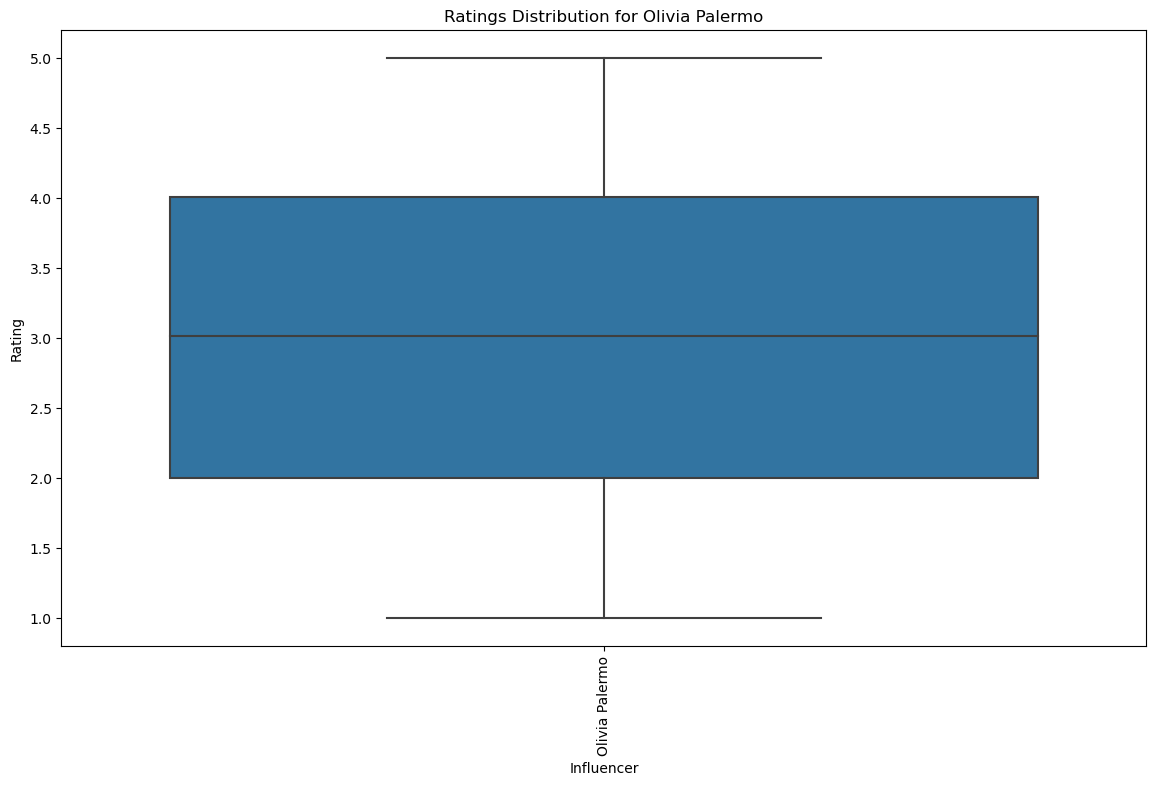

In [31]:
# Create a DataFrame to combine average rating and total sales for each influencer
influencer_impact = pd.DataFrame({
    'Total Sales': sales_by_influencer,
    'Average Rating': avg_rating_by_influencer
}).reset_index()
influencer_impact.columns = ['Influencer', 'Total Sales', 'Average Rating']  # Rename columns appropriately

# Ensure that the 'Influencer' column is available
print(influencer_impact.head())  # Debugging line to check if 'Influencer' column exists

# Select top influencers based on total sales or ratings
top_influencers = influencer_impact.sort_values(by='Total Sales', ascending=False)['Influencer'].head(5)  # Adjust based on your criteria

# Ensure that top_influencers contains the right values
print(top_influencers)  # Debugging line to check the values in top_influencers

# Filter DataFrame for top influencers
top_influencer_data = df_influencers[df_influencers['Fashion_Influencers'].isin(top_influencers)]

# Ensure that top_influencer_data has the correct data
print(top_influencer_data.head())  # Debugging line to check the filtered data

# Create individual plots for each top influencer
for influencer in top_influencers:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Fashion_Influencers', y='Rating', data=top_influencer_data[top_influencer_data['Fashion_Influencers'] == influencer])
    plt.title(f'Ratings Distribution for {influencer}')
    plt.xlabel('Influencer')
    plt.ylabel('Rating')
    plt.xticks(rotation=90)
    plt.show()


Mean Squared Error: 49.08207672439895
R-squared: 0.9322388327835923


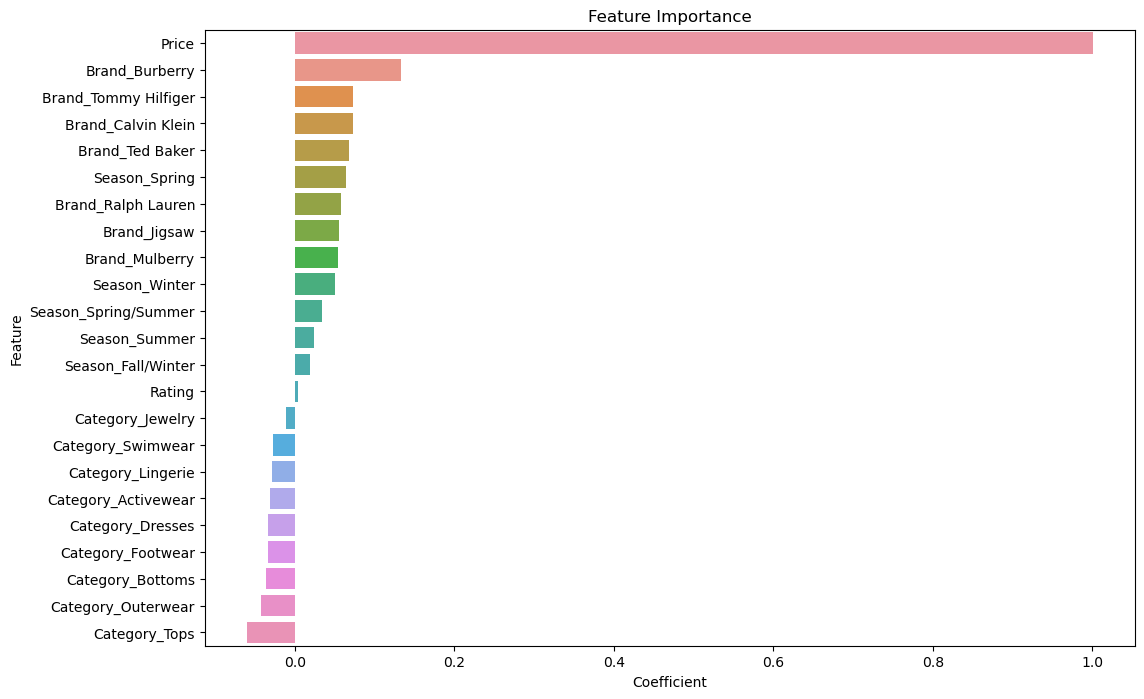

In [18]:
# Simulate the 'Optimal Price' column for demonstration purposes
np.random.seed(42)
df['Optimal Price'] = df['Price'] * np.random.uniform(0.8, 1.2, size=len(df))

# Pricing Optimization using Linear Regression
X = df[['Price', 'Brand', 'Category', 'Rating', 'Season']]
y = df['Optimal Price']

# Encode categorical features
X = pd.get_dummies(X, columns=['Brand', 'Category', 'Season'], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_}).sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()



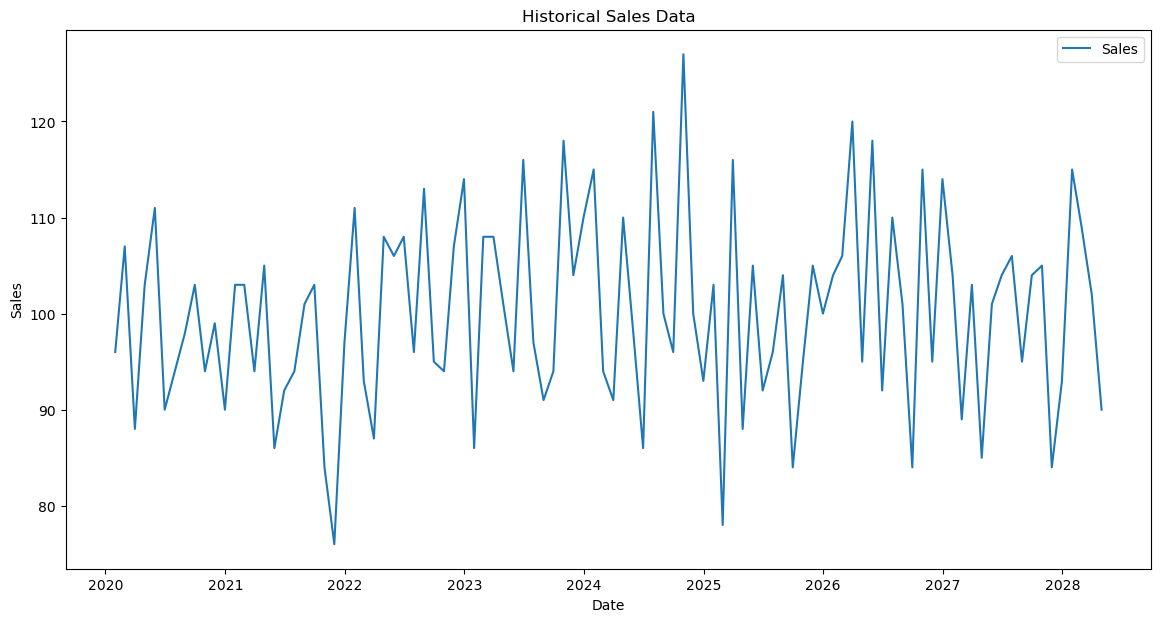

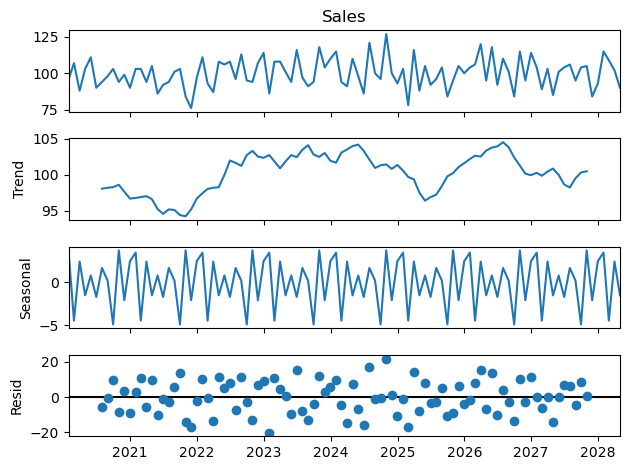

Mean Squared Error: 8.97548407718129e-28
R-squared: 1.0


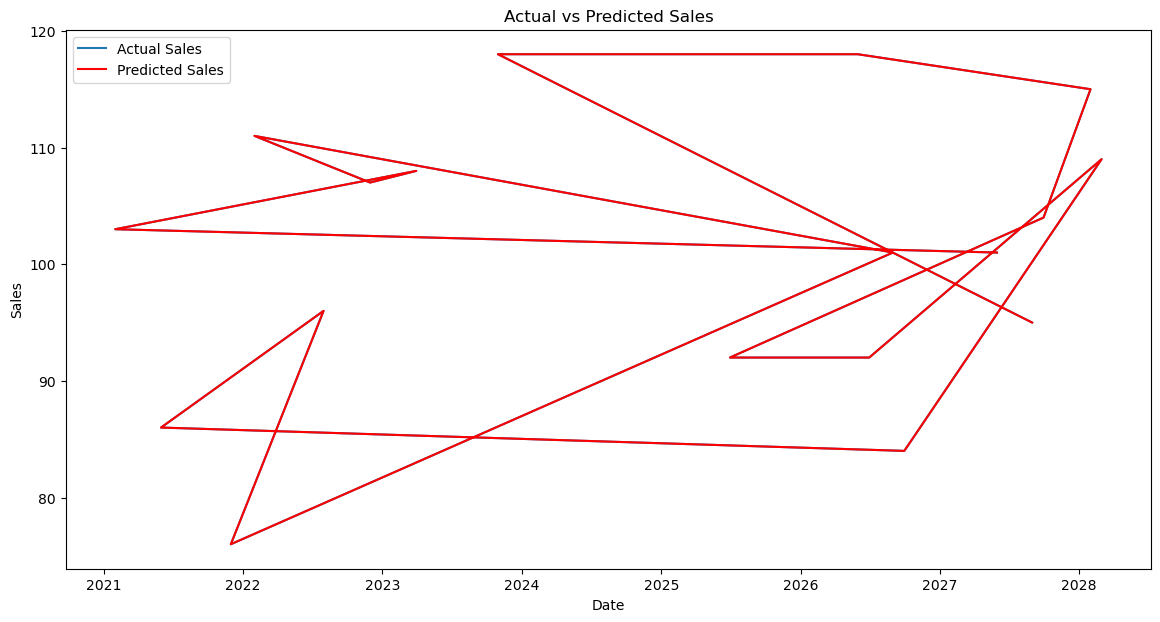

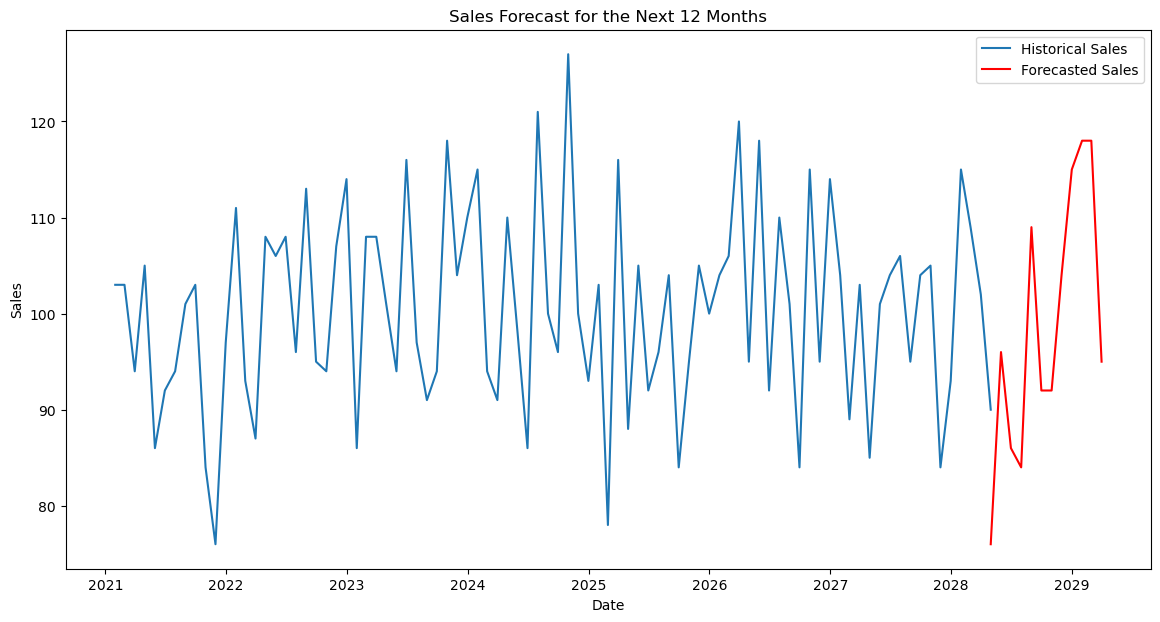

In [19]:
# Time Series Analysis: Sales Data
np.random.seed(42)
sales_data = np.random.poisson(100, 100)
df_sales = pd.DataFrame({'Sales': sales_data})

# Add Date index
df_sales['Date'] = pd.date_range(start='2020-01-01', periods=len(df_sales), freq='M')
df_sales.set_index('Date', inplace=True)

# Plot historical sales data
plt.figure(figsize=(14, 7))
plt.plot(df_sales['Sales'], label='Sales')
plt.title('Historical Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Seasonal Decomposition
decomposition = seasonal_decompose(df_sales['Sales'], model='additive', period=12)
decomposition.plot()
plt.show()

# Feature Engineering for time series
df_sales['Lag_1'] = df_sales['Sales'].shift(1)
df_sales['Lag_2'] = df_sales['Sales'].shift(2)
df_sales['Lag_12'] = df_sales['Sales'].shift(12)
df_sales['Rolling_Mean_3'] = df_sales['Sales'].rolling(window=3).mean()
df_sales['Rolling_Mean_12'] = df_sales['Sales'].rolling(window=12).mean()
df_sales.dropna(inplace=True)

# Linear Regression for time series
X = df_sales[['Lag_1', 'Lag_2', 'Lag_12', 'Rolling_Mean_3', 'Rolling_Mean_12']]
y = df_sales['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot Actual vs Predicted Sales
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Sales')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Sales Forecast (e.g., next 12 months)
future_forecast = model.predict(X_test[-12:])
plt.figure(figsize=(14, 7))
plt.plot(df_sales.index, df_sales['Sales'], label='Historical Sales')
plt.plot(pd.date_range(df_sales.index[-1], periods=12, freq='M'), future_forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


Conclusion
This project demonstrates the end-to-end process of analyzing, modeling, and predicting key metrics in the fashion retail industry using a synthetic dataset. Through a combination of data cleaning, exploratory data analysis (EDA), feature engineering, and predictive modeling, the project addresses two primary business objectives:

Pricing Optimization:

By leveraging Linear Regression, the project predicts optimal pricing strategies for products based on various features such as brand, category, and season. This model can help businesses maximize revenue by identifying price points that resonate best with customers, taking into account the impact of various product attributes.
The analysis of feature importance highlights which factors most strongly influence optimal pricing, providing actionable insights for pricing strategies.
Sales Forecasting:

The project employs time series analysis and forecasting techniques to predict future sales. By engineering time-lagged features and rolling averages, the Linear Regression model is trained to forecast sales for upcoming periods.
This approach allows businesses to anticipate demand and adjust inventory, marketing, and operational strategies accordingly. The sales forecast for the next 12 months provides a clear visualization of expected trends, helping stakeholders plan effectively.
Key Takeaways:
Data Preparation: Cleaning and preprocessing the dataset is crucial for accurate model performance. This project ensured that categorical variables were appropriately encoded and that time series data was structured correctly for analysis.

Modeling Techniques: Linear Regression, although simple, proved effective for both pricing optimization and sales forecasting. The transparency of this model allows for easy interpretation of results, making it a valuable tool in retail analytics.

Visualizations: Through comprehensive EDA and result visualization, the project offers clear insights into the data and model performance, facilitating better decision-making.